Questions:
Average number of accidents per hour plotted as time series (x= hour of the day, y= avg numb accidents) (Hannah)
Do the timings of accidents vary depending on day of the week? (Pooja)
Demonstrate skills with GroupBy and/or Pivot Table (Hannah - groupby)
Reporting date same as incident date? Check to make sure. YES THEY ARE ALL THE SAME!!! (Hannah)
District which reported the most? (Hannah)
Is there a relationship between time and location? (Hannah)
More accidents in particular areas, given particular time? (similar to one above; Hannah)
Which location has most accidents? (Rachel)
At what time do most accidents occur? (Hannah)
Zipcode frequency of accident? (Rachel)
Victim age and time relationship? (Pooja)
Area name (Khyathi) Collisions by Area name (Khyathi)
Collisions per year (Khyathi)
Collisions per month (Khyathi)
Collsioons per weekday (Khyathi)
Who gets in a crash in a parking lot? (Pooja)
Victim demographics - who gets into crashes? (Hannah - I got average age of accidents grouped by sex then descent)
Which council districts appear most often? (Rachel)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as ticker
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [11]:
#General Cleaning
#Reading the data file
losAngelesdf = pd.read_csv('traffic-collision-data-from-2010-to-present.csv')
#losAngelesdf.info()traffic-collision-data-from-2010-to-present.csv
#Dropping duplicates
losAngelesdf.drop_duplicates().info()
#losAngelesdf
#Dropping a few columns that might not be of a value add to us
losAngelesdf.drop(['Area ID','Crime Code',
                   'MO Codes','Premise Code','Precinct Boundaries','LA Specific Plans'],axis=1, inplace=True)
#Date manipulation
losAngelesdf['Date'] =  pd.to_datetime(losAngelesdf['Date Occurred'], format='%Y-%m-%dT%H:%M:%S')
losAngelesdf['year'] = pd.DatetimeIndex(losAngelesdf['Date']).year
losAngelesdf['month'] = pd.DatetimeIndex(losAngelesdf['Date']).month
losAngelesdf['weekday']= pd.DatetimeIndex(losAngelesdf['Date']).dayofweek
new = losAngelesdf['Location'].str.split(",", expand=True)
new2 = new[0].str.split(":", expand=True)
losAngelesdf['Latitude'] = new2[1].str.replace("'","").astype(float)
losAngelesdf['Longitude'] = new[5].str.split(":", expand=True)[1].str.replace("'","").str.replace("}","").astype(float)
losAngelesdf['day-of-week'] = losAngelesdf['Date'].dt.day_name()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480557 entries, 0 to 481567
Data columns (total 24 columns):
DR Number                            480557 non-null int64
Date Reported                        480557 non-null object
Date Occurred                        480557 non-null object
Time Occurred                        480557 non-null int64
Area ID                              480557 non-null int64
Area Name                            480557 non-null object
Reporting District                   480557 non-null int64
Crime Code                           480557 non-null int64
Crime Code Description               480557 non-null object
MO Codes                             395843 non-null object
Victim Age                           403182 non-null float64
Victim Sex                           473525 non-null object
Victim Descent                       472792 non-null object
Premise Code                         480532 non-null float64
Premise Description                  480532 non-null

In [12]:
#CLEANING DATA. Filling in Victim's age with average age.
mean_age = losAngelesdf['Victim Age'].mean()
noAged = pd.DataFrame()
noAged = losAngelesdf.copy(deep = True)
noAged['Victim Age'].dropna(inplace = True)
forLater = noAged['Victim Age'].value_counts()
losAngelesdf['Victim Age'].fillna(mean_age, inplace = True)
losAngelesdf['Date Occurred'].replace(regex=True,inplace=True,to_replace=r'T00:00:00.000',value=r'')
#replace H,N with X because all are unknown
losAngelesdf['Victim Sex'] = losAngelesdf['Victim Sex'].replace(['H', 'N',''], 'X')
#get hour of time instead of by minute
losAngelesdf['Time (hour)'] = losAngelesdf['Time Occurred'].floordiv(100)

Average number of accidents per hour plotted as time series (x= hour of the day, y= avg numb accidents)

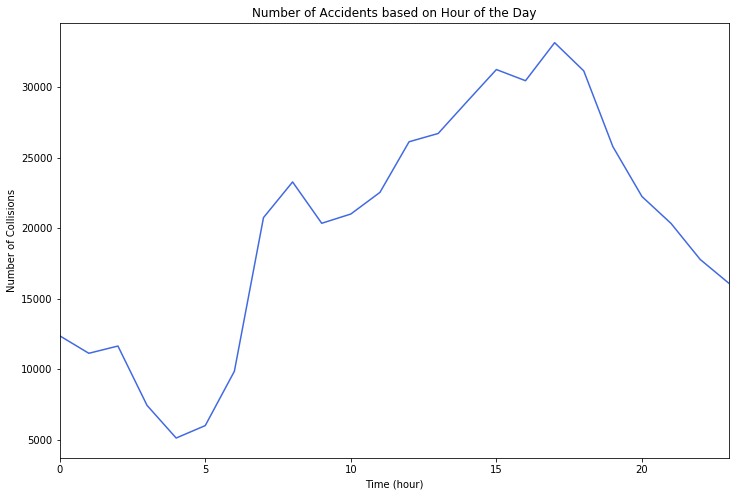

In [5]:
#number of accidents at this time (time on x, # of accidents on y)
temp = losAngelesdf.groupby('Time (hour)')['Date Occurred'].count()
temp.plot(figsize = (12,8), color = 'royalblue', title = 'Number of Accidents based on Hour of the Day')
ylabel('Number of Collisions')
show()

Text(0,0.5,'Number of Collisions')

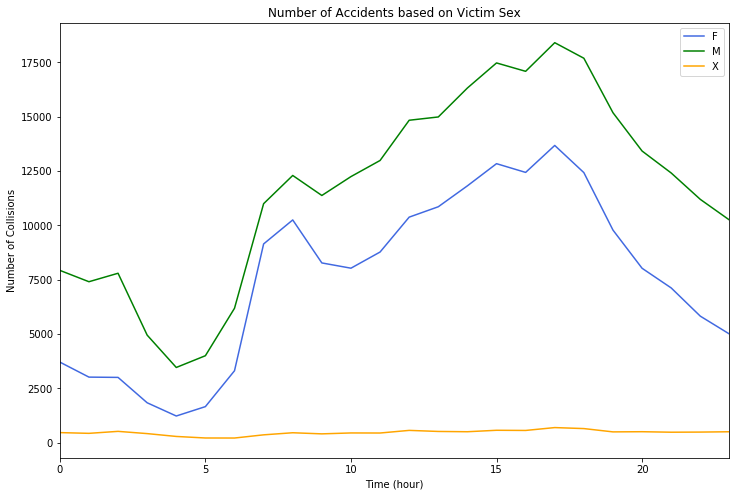

In [6]:
#number of accidents at this time based on Sex (time on x, # of accidents on y)
temp = losAngelesdf.groupby(['Time (hour)', 'Victim Sex'])['Date Occurred'].count()
#temp2 = data.groupby('Time (hour)')['Date Occurred'].count()
colours = ['royalblue', 'green', 'orange'][0:len(losAngelesdf['Victim Sex'])]
temp.unstack().plot(figsize = (12,8), color = colours, title = 'Number of Accidents based on Victim Sex').legend(bbox_to_anchor=(1,1))
ylabel('Number of Collisions')

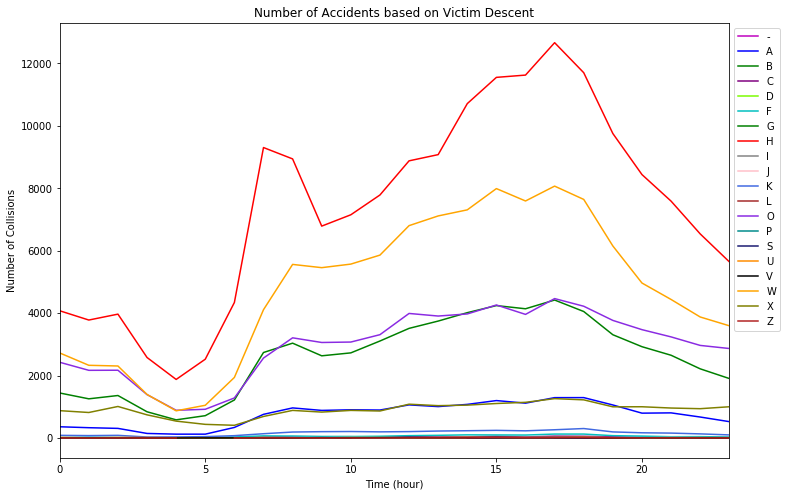

In [7]:
#number of accidents at this time based on Victim Descent (time on x, # of accidents on y)
import seaborn as sns
temp = losAngelesdf.groupby(['Time (hour)', 'Victim Descent'])['Date Occurred'].count()
colours = ['m', 'blue','g','purple','lawngreen','c', 'green','red', '125','pink', 'royalblue', 'brown', 'blueviolet', 'darkcyan', 'midnightblue', 'darkorange', 'black', 'orange', 'olive', 'firebrick' ][0:len(losAngelesdf['Victim Descent'])]
#temp2 = data.groupby('Time (hour)')['Date Occurred'].count()
temp.unstack().plot(figsize = (12,8), color = colours, title = 'Number of Accidents based on Victim Descent').legend(bbox_to_anchor=(1,1))
ylabel('Number of Collisions')
show()

Do the timings of accidents vary depending on day of the week?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

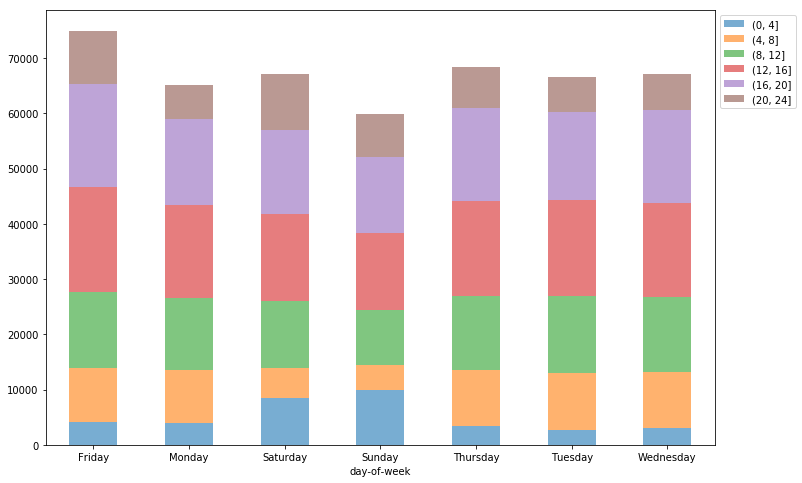

In [8]:
losAngelesdf['Time Range'] = pd.cut(losAngelesdf['Time (hour)'], [0,4,8,12,16,20,24])
traffic_data_ans = losAngelesdf.groupby(['day-of-week','Time Range'])[['DR Number']].count().reset_index()
pivot_df = traffic_data_ans.pivot(index='day-of-week', columns='Time Range', values='DR Number')
#pivot_df = pivot_df*100/pivot_df.sum()
pivot_df
pivot_df.plot.bar(figsize = (12,8), stacked=True, alpha = 0.6).legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
#..loc[:,['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']]

Is there a relationship between time and location?

In [9]:
#see if more accidents happen at certain time in certain areas (zip codes or area names)
#Where the most accidents happen at this time
temp = losAngelesdf.groupby(['Time (hour)', 'Area Name'])['Date Occurred'].count()
df = temp.unstack()
df2 = pd.DataFrame()
df2['Number of Collisions'] = df.max(axis=1)
df2['Area Name'] = df.idxmax(axis = 1)
df2

,Number of Collisions,Area Name
Time (hour),,
0,869,Hollywood
1,885,Hollywood
2,1143,Hollywood
3,559,77th Street
4,392,77th Street
5,481,77th Street
6,677,77th Street
7,1421,Southwest
8,1491,Southwest


Which location has most accidents?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

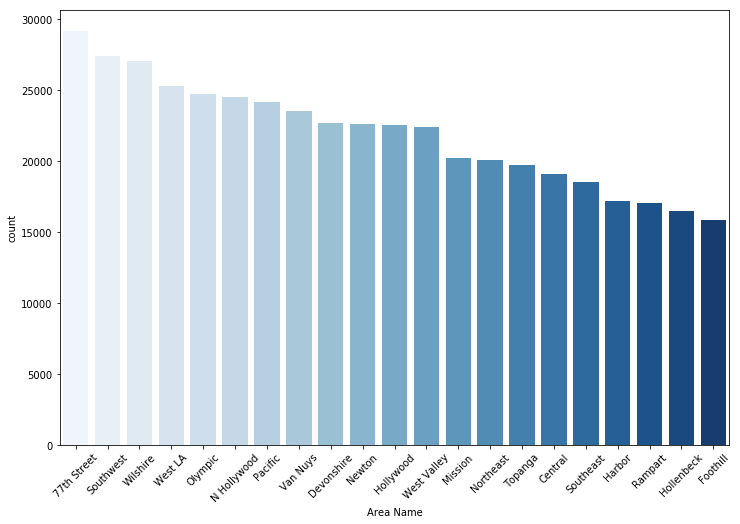

In [10]:
Area = losAngelesdf
Area = Area[Area['Address'].notnull()]
Area =Area[Area['Cross Street'].notnull()]
#Area['Area Name'].value_counts().plot(kind='bar')
descending_order = Area['Area Name'].value_counts().sort_values(ascending=False).index
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x="Area Name",data= Area, order = descending_order, palette = 'Blues')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

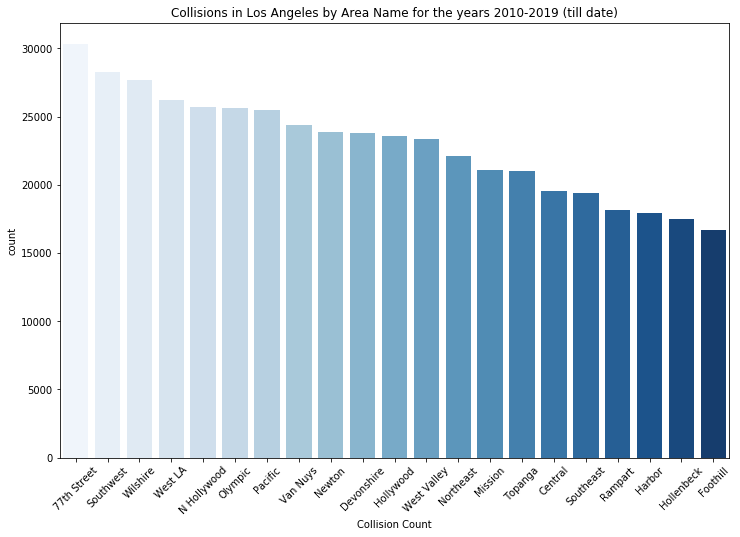

In [11]:
fig,ax = plt.subplots(figsize=(12,8))
descending_order = losAngelesdf['Area Name'].value_counts().sort_values(ascending=False).index
sns.countplot(x="Area Name",data=losAngelesdf, order = descending_order, palette = 'Blues')
ax.set_title('Collisions in Los Angeles by Area Name for the years 2010-2019 (till date)');
plt.xlabel('Collision Count')
plt.xticks(rotation=45)
#plt.savefig('areaName.jpeg')

Let's test to see if 'Area ID' is identical to the data in 'Area Name'

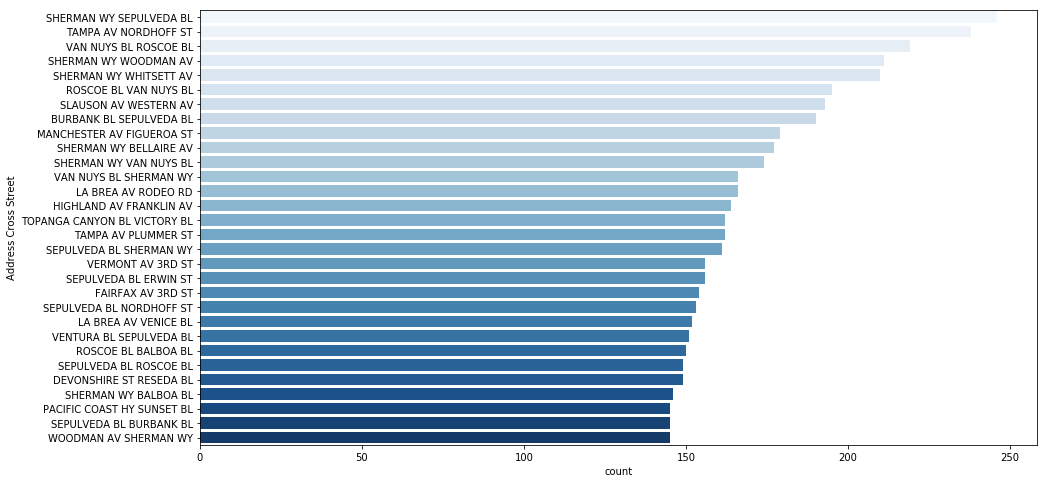

In [12]:
Area['Address Cross Street']=((Area['Address']+' '+Area['Cross Street'])).str.replace(' +',' ')
myorder = Area['Address Cross Street'].value_counts()[0:30].index
#Area['Address Cross Street'].value_counts()[0:30].plot(kind='bar')

fig,ax = plt.subplots(figsize=(15,8))
#descending_order = losAngelesdf['Area Name'].value_counts().sort_values(ascending=False).index
sns.countplot(y="Address Cross Street", data=Area, order = myorder, palette = 'Blues')
#plt.xticks(rotation=90)
#ax.set_title('Collisions in Los Angeles by Area Name for the years 2010-2019 (till date)');

Looking at the plot above, there is a problem: "Slauson and Western" should be the same intersection as "Western and Slauson", but these values show up differently.

In [13]:

Area['Address'] = Area['Address'].str.replace(' +',' ')
Area['Cross Street'] = Area['Cross Street'].str.replace(' +',' ')
Area['Address Cross Street'] = Area['Address'] +'*'+Area['Cross Street']

def street_order(addresses):
    return " ".join(sorted(addresses.split('*')))

Area['Address Cross Street'] = Area['Address Cross Street'].map(street_order)
Area['Address Cross Street'][:10]

0          BALBOA BL PARTHENIA ST
1     CREST KNOLL AV EDGECLIFF DR
2       LAURELGROVE AV SATICOY ST
3           NORDHOFF ST TOBIAS AV
4          BELLAIRE AV SHERMAN WY
5     COAL CANYON RD WENTWORTH ST
6     PALM GROVE AV WASHINGTON BL
7       BELOIT AV SANTA MONICA BL
9           VENTURA FY WOODMAN AV
10              8TH ST LA BREA AV
Name: Address Cross Street, dtype: object

Where do most accidents happen in Parking lots?

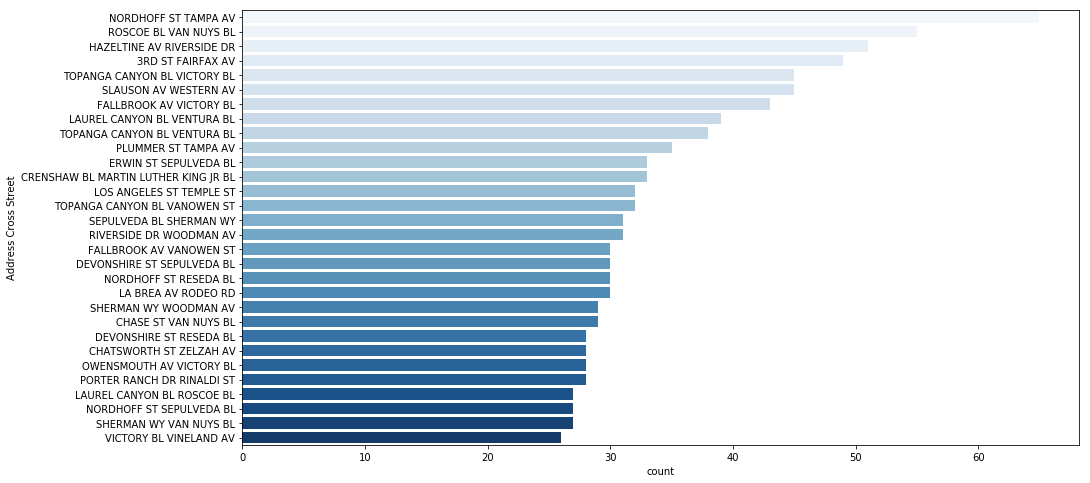

In [14]:
#descending_order = losAngelesdf['Area Name'].value_counts().sort_values(ascending=False).index
#sns.countplot(y="Area Name",data=losAngelesdf, order = descending_order)

fig,ax = plt.subplots(figsize=(15,8))
Parking = Area[Area['Premise Description'] == 'PARKING LOT']
myorder = Parking['Address Cross Street'].value_counts()[0:30].sort_values(ascending=False).index
sns.countplot(y = 'Address Cross Street', data = Parking, order = myorder, palette = 'Blues')
#.plot(figsize = (12,8),kind='bar')

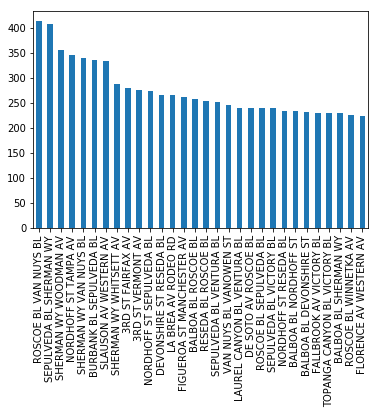

In [15]:
Area['Address Cross Street'].value_counts()[0:30].plot(kind='bar')

District which reported the most?

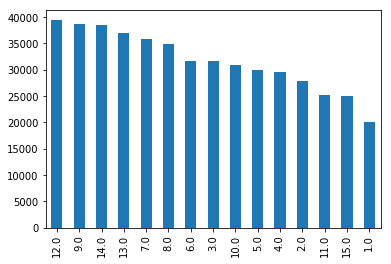

In [16]:
#15 city council districts. Council districts refer to a small local areas in the city.
district_data = losAngelesdf['Council Districts'].value_counts().plot(kind = 'bar')
#we see that district 12 is the council district with the most traffic collisions

Within each Council District, which Neighborhood Councils have the most collisions?

In [17]:
Area['Unique Collision'] = Area['DR Number'].astype(str) + Area['Address Cross Street']
by_nbhd = Area.groupby(by = ['Council Districts','Neighborhood Councils (Certified)'])[['Unique Collision']].agg(['count']).unstack(['Neighborhood Councils (Certified)'])
max_col = by_nbhd.idxmax(axis=1)
max_col

Council Districts
1.0     (Unique Collision, count, 11.0)
2.0     (Unique Collision, count, 43.0)
3.0     (Unique Collision, count, 18.0)
4.0     (Unique Collision, count, 49.0)
5.0     (Unique Collision, count, 13.0)
6.0     (Unique Collision, count, 26.0)
7.0     (Unique Collision, count, 83.0)
8.0     (Unique Collision, count, 34.0)
9.0     (Unique Collision, count, 76.0)
10.0    (Unique Collision, count, 16.0)
11.0     (Unique Collision, count, 8.0)
12.0    (Unique Collision, count, 89.0)
13.0     (Unique Collision, count, 2.0)
14.0    (Unique Collision, count, 45.0)
15.0    (Unique Collision, count, 15.0)
dtype: object

This means that for council district 1, the neighborhood council 11 had the most collisions. For council district 2, neighborhood council 43 had the most collisions, etc...

Victim age and time relationship?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

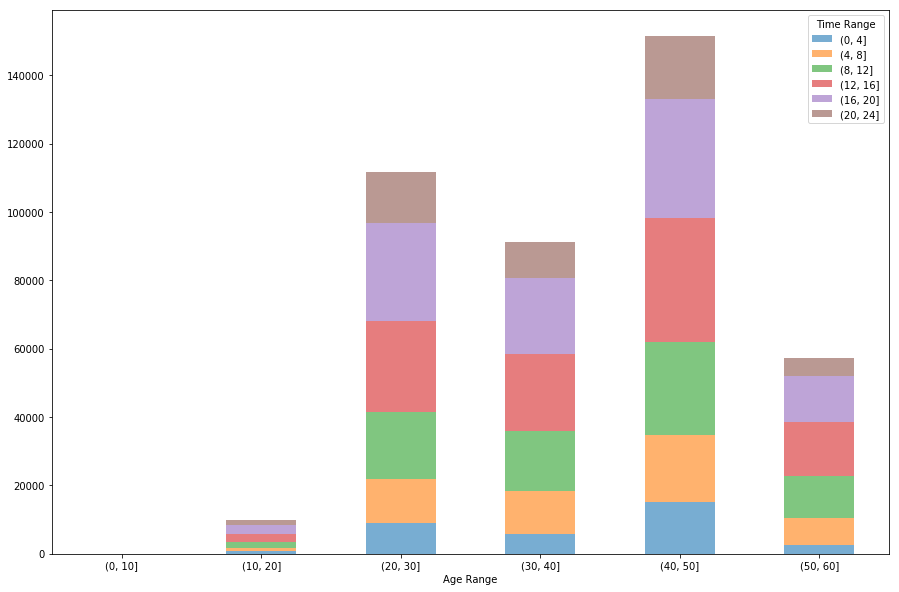

In [18]:
#Victim age and time relationship?
losAngelesdf['Age Range'] = pd.cut(losAngelesdf['Victim Age'], [0,10,20,30,40,50,60])
traffic_data_ans2 = losAngelesdf.groupby(['Age Range','Time Range'])[['DR Number']].count().reset_index()
pivot_df = traffic_data_ans2.pivot(index='Age Range', columns='Time Range', values='DR Number')
#pivot_df = pivot_df*100/pivot_df.sum()
pivot_df
pivot_df.plot.bar(figsize=(15,10),stacked=True, alpha = 0.6)
plt.xticks(rotation=0)
#dftemp2 = traffic_data_ans2.unstack(level=-1)
#dftemp2

Collisions per year

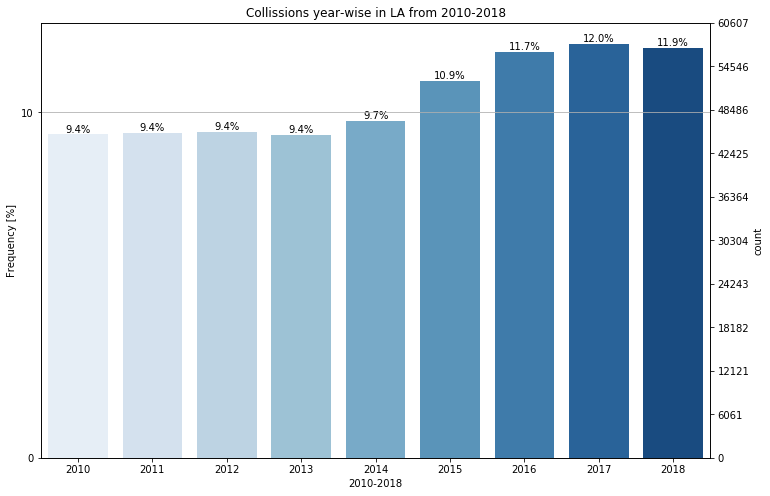

In [19]:
laYearWise = losAngelesdf[losAngelesdf['year']<2019] # Removing 2019 for being incomplete
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x = 'year',data = laYearWise,palette='Blues')
ax.set_title('Collissions year-wise in LA from 2010-2018');
plt.xlabel('2010-2018')
ncount = len(losAngelesdf)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,100)
#ax.set_ylim(0,ncount)
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

Collisions per month 

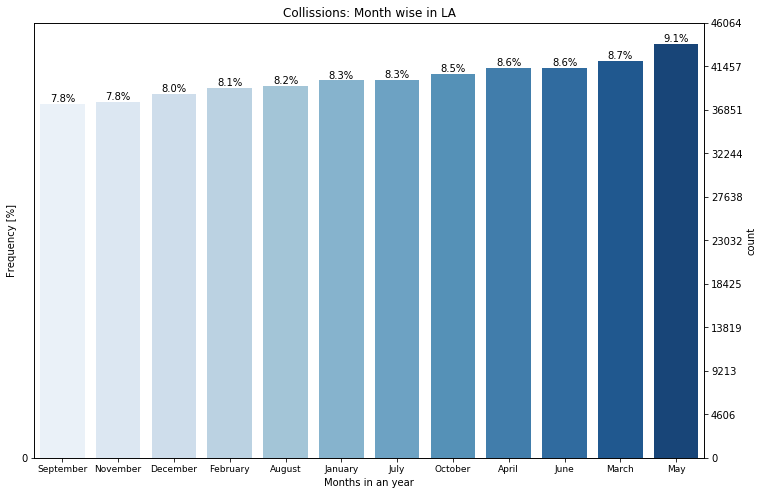

In [20]:
fig,ax = plt.subplots(figsize=(12,8))
ascending_order = losAngelesdf['month'].value_counts().sort_values(ascending=True).index
sns.countplot(x = 'month',data = losAngelesdf,order = ascending_order,palette='Blues')

ax.set_xticklabels(["September", "November", "December", "February", "August", "January", 
                    "July","October","April","June","March","May"], fontsize=9)
ax.set_title('Collissions: Month wise in LA');
plt.xlabel('Months in an year')
ncount = len(losAngelesdf)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,100)
#ax.set_ylim(0,ncount)
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

plt.savefig('monthwise.jpeg')


Collisons per weekday

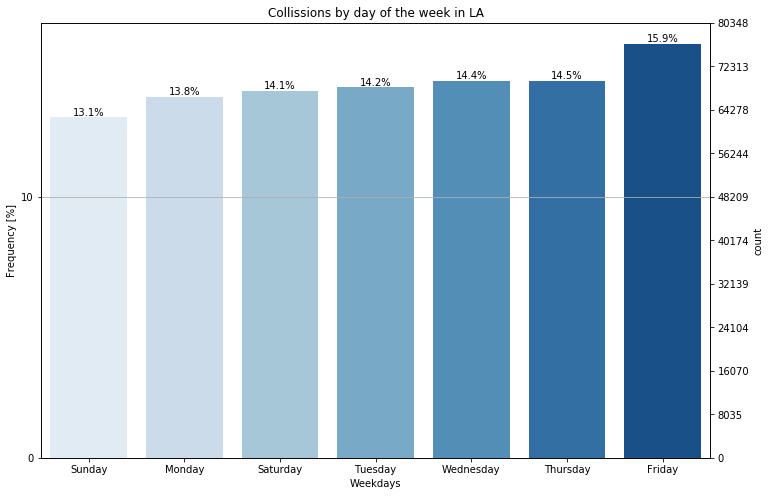

In [21]:
fig,ax = plt.subplots(figsize=(12,8))
ascending_order = losAngelesdf['weekday'].value_counts().sort_values(ascending=True).index
sns.countplot(x = 'weekday',data = losAngelesdf,order = ascending_order, palette='Blues')
ax.set_xticklabels(["Sunday", "Monday", "Saturday", "Tuesday", "Wednesday", "Thursday", "Friday"], fontsize=10)
ax.set_title('Collissions by day of the week in LA');
plt.xlabel('Weekdays')
ncount = len(losAngelesdf)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,100)
#ax.set_ylim(0,ncount)
ax2.set_ylim(0,100*ax.get_ylim()[1]/ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

#plt.savefig('daywise.pdf')

Victim demographics - who gets into crashes?

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

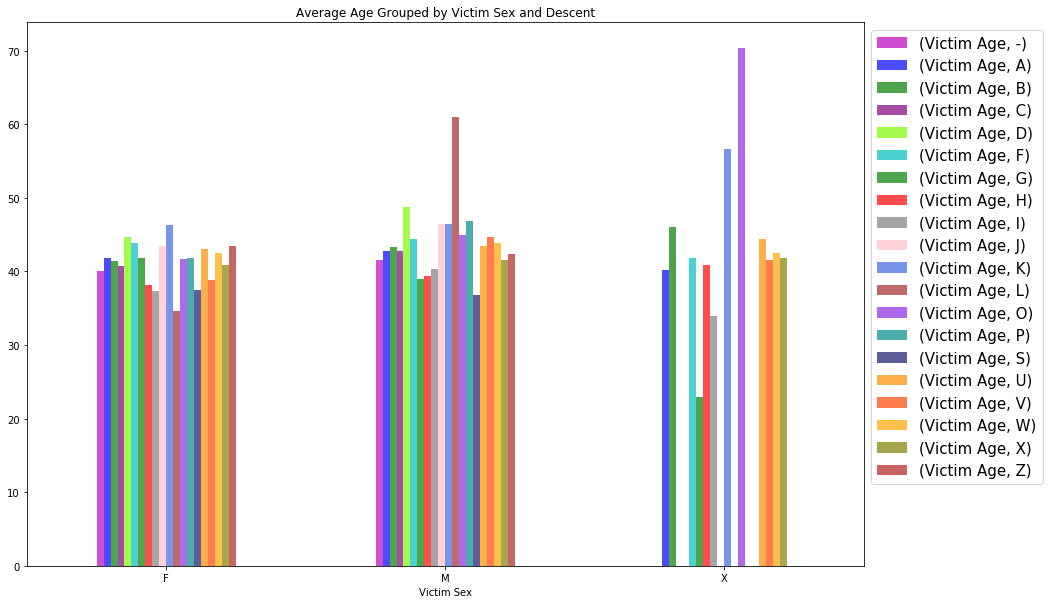

In [22]:
#seeing average age in collisions grouped by sex and descent.
import seaborn as sns
mydf = losAngelesdf.groupby(['Victim Sex', 'Victim Descent'])[['Victim Age']].mean().unstack()
colours = ['m', 'blue','g','purple','lawngreen','c', 'green','red', 'gray','pink', 'royalblue', 'brown', 'blueviolet', 'darkcyan', 'midnightblue', 'darkorange', 'orangered', 'orange', 'olive', 'firebrick' ][0:len(losAngelesdf['Victim Descent'])]
mydf.plot(figsize=(15,10), kind = 'bar',alpha = .7, color = colours, title = 'Average Age Grouped by Victim Sex and Descent').legend(bbox_to_anchor=(1,1), fontsize=15)
plt.xticks(rotation=0)

Are all of the drivers unique? If not, what percentage of collisions involve repeat offenders?

In [23]:
losAngelesdf['DR Number'].is_unique

False

In [24]:
collision_count = pd.cut(losAngelesdf['DR Number'].value_counts(),2)
collision_count.value_counts()

(0.999, 1.5]    479546
(1.5, 2.0]        1011
Name: DR Number, dtype: int64

In [25]:
1011.0/479546

0.0021082440474949225

This means that only 0.2% of collisions in this data set involved drivers who were in more than one accident.

Heatmap Attempts

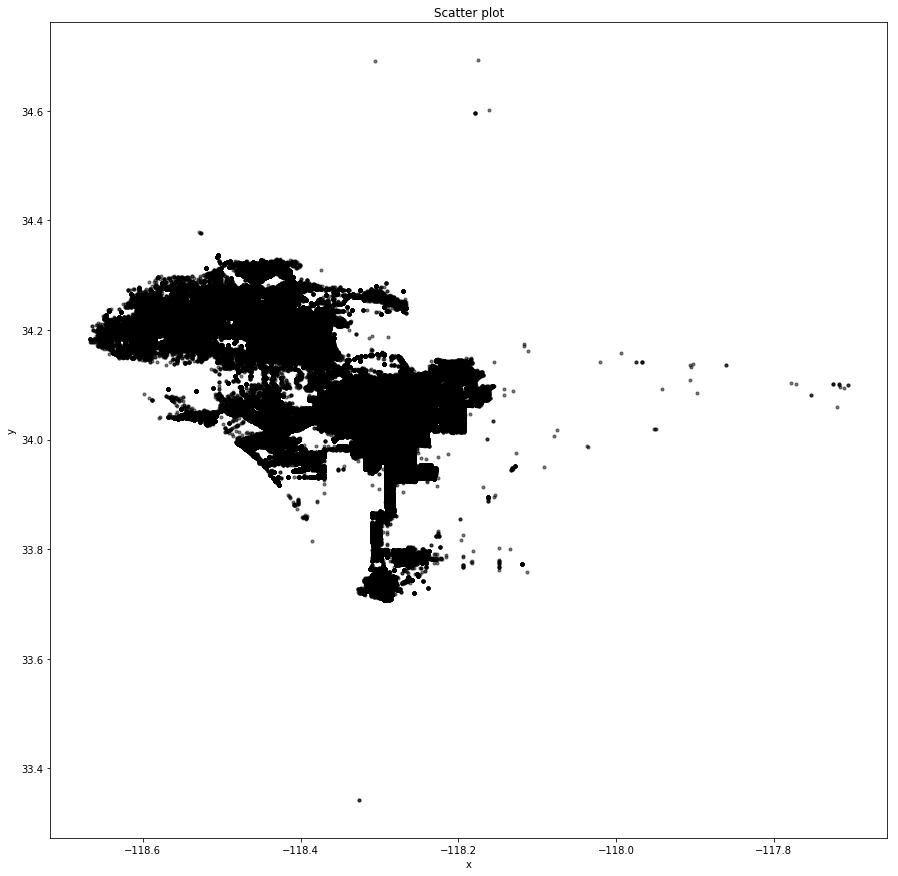

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
traffic_data= losAngelesdf[losAngelesdf['Latitude'] != 0.0]
x=traffic_data['Longitude']
y=traffic_data['Latitude']
colors = ('black')
area = np.pi*3

# Plot
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 432x288 with 0 Axes>

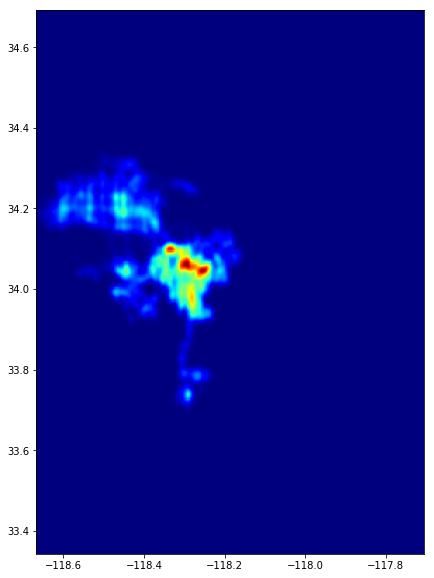

In [27]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

heatmap, xedges, yedges = np.histogram2d(x, y, bins=500)
heatmap = gaussian_filter(heatmap, sigma=3)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

plt.clf()
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap=cm.jet)
plt.show()

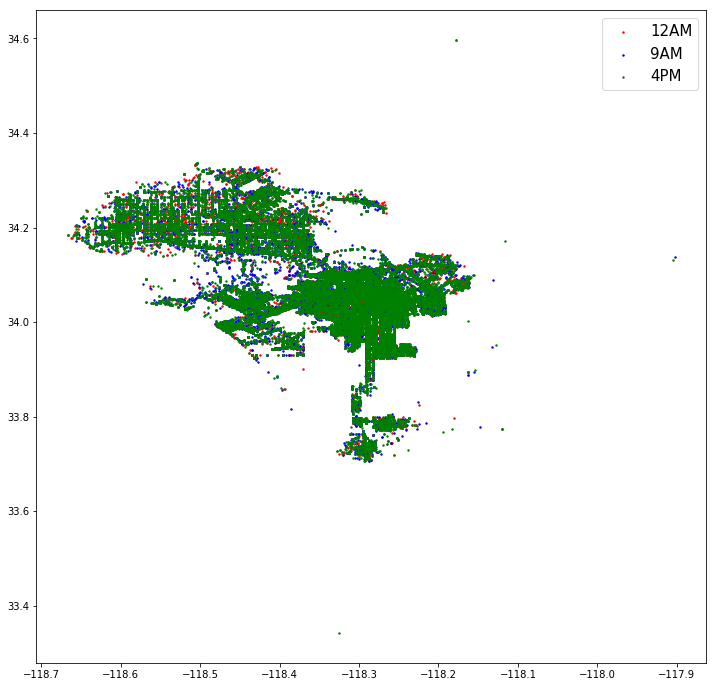

In [28]:
import descartes
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

traffic_data = losAngelesdf[losAngelesdf['Latitude'] != 0.0000]
la_map = gpd.read_file("CA_Counties_TIGER2016.shp")
fig, ax = plt.subplots(figsize = (12,12))
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(traffic_data['Longitude'], traffic_data['Latitude'])]
geo_data = gpd.GeoDataFrame(traffic_data, crs = crs, geometry = geometry)

geo_data[geo_data['Time (hour)'] == 0].plot(ax = ax, markersize = 2, color = 'red', marker = 'o', label = '12AM')
geo_data[geo_data['Time (hour)'] == 9].plot(ax = ax, markersize = 2, color = 'blue', marker = 'o', label = '9AM')
geo_data[geo_data['Time (hour)'] == 16].plot(ax = ax, markersize = 2, color = 'green', marker = 'o', label = '4PM')
plt.legend(prop={'size': 15})

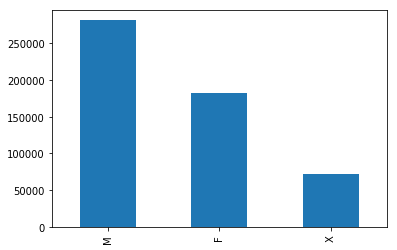

In [40]:
#noAged['Victim Age'].value_counts()
#losAngelesdf['Victim Age'].value_counts()[:10]
losAngelesdf['Victim Descent'].value_counts()[:10].plot(kind = 'bar')
losAngelesdf['Victim Sex'].value_counts()[:10].plot(kind = 'bar')